   End-to-End Multi-class Dog Breed Classification

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!unzip "/content/drive/MyDrive/dog-breed-identification/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog-breed-identification/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/MyDrive/dog-breed-identification/train/83fad0718581a696132c96c166472627.j

In [2]:
# Import  tools
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/drive/MyDrive/dog-breed-identification/labels.csv")
data.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
data.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

<Axes: >

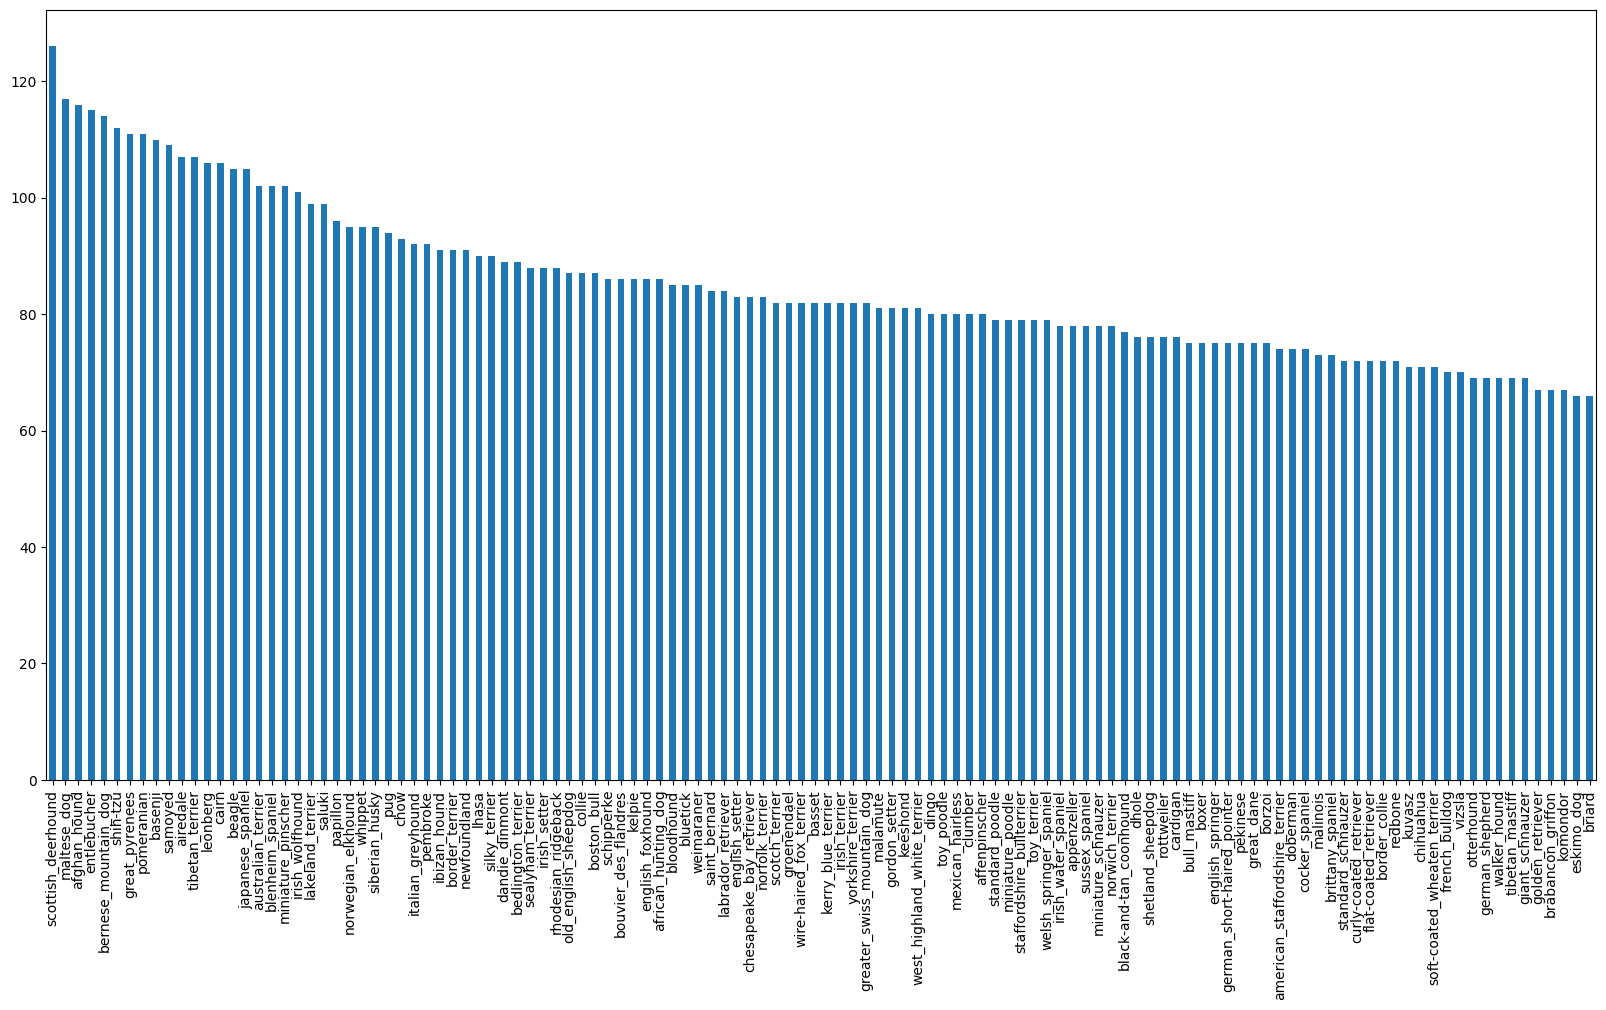

In [5]:
data["breed"].value_counts().plot.bar(figsize=(20,10))

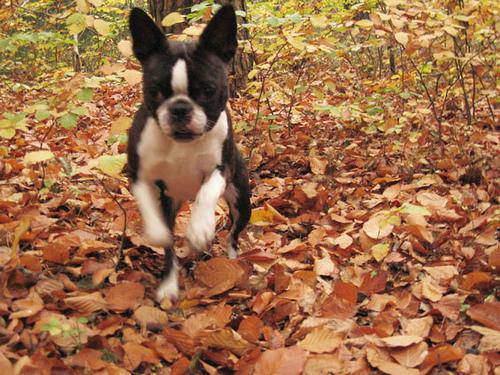

In [6]:
from IPython.display import Image

Image("drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [7]:
# craete pathname from image ID's

filenames = ["drive/MyDrive/dog-breed-identification/train/" + fname + ".jpg" for fname in data["id"]]
filenames

['drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/dog-breed-identification/train/0067dc3

In [8]:
import os
len(os.listdir("drive/MyDrive/dog-breed-identification/train/")) == len(filenames)

True

In [9]:
len(os.listdir("drive/MyDrive/dog-breed-identification/train/"))

10222

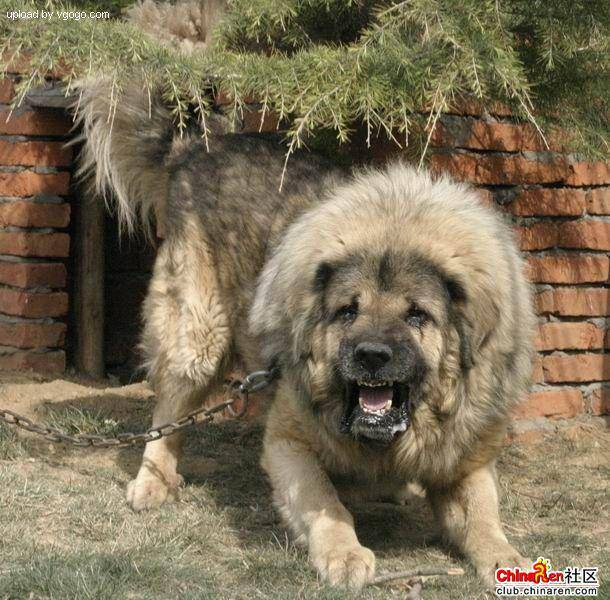

In [10]:
Image(filenames[9000])

In [11]:
data["breed"][9000]

'tibetan_mastiff'

In [12]:
labels = data["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
len(labels) == len(filenames)

True

In [15]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [16]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
len(boolean_labels)

10222

In [19]:
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [20]:
# creating validation set
X = filenames
y = boolean_labels

In [21]:
NUM_IMAGES = 1000

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val)

(800, 200)

In [23]:
# preprocessing images into tensor
from matplotlib.pyplot import imread

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [24]:
image.max(), image.min()

(255, 0)

In [25]:
# turn image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [26]:
# define image size
IMG_SIZE = 224

In [27]:
# Function to process an image
def process_image(image_path, img_size=IMG_SIZE):
    """
    Take an image filepath and turn the image into a tensor.
    """
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image


In [28]:
# turn data into batches

# Create function to return tupl(image, label)
def get_image_label(image_path, label):
  """
  Take an image filepath name and asscociated label,
  processes the image return atype of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [29]:
BATCH_SIZE = 32

# Function to create data batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of out of image and label pairs.
    """
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch

    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_label)
        data_batche = data.batch(BATCH_SIZE)
        return data_batche


In [30]:
# Creating traning and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [31]:
# Check out different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [32]:
## visualizing Data ##

import matplotlib.pyplot as plt

# create a function for viewing image in a data batch

def show_25_images(image, labels):
  """
  Display a plot of 25 images and their labels from a data batch
  """
  # setup the figure
  plt.figure(figsize=(10,10))
  #Loop through 25
  for i in range(25):
    # Create suibplot (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an images
    plt.imshow(image[i])
    # add image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid line off
    plt.axis("off")

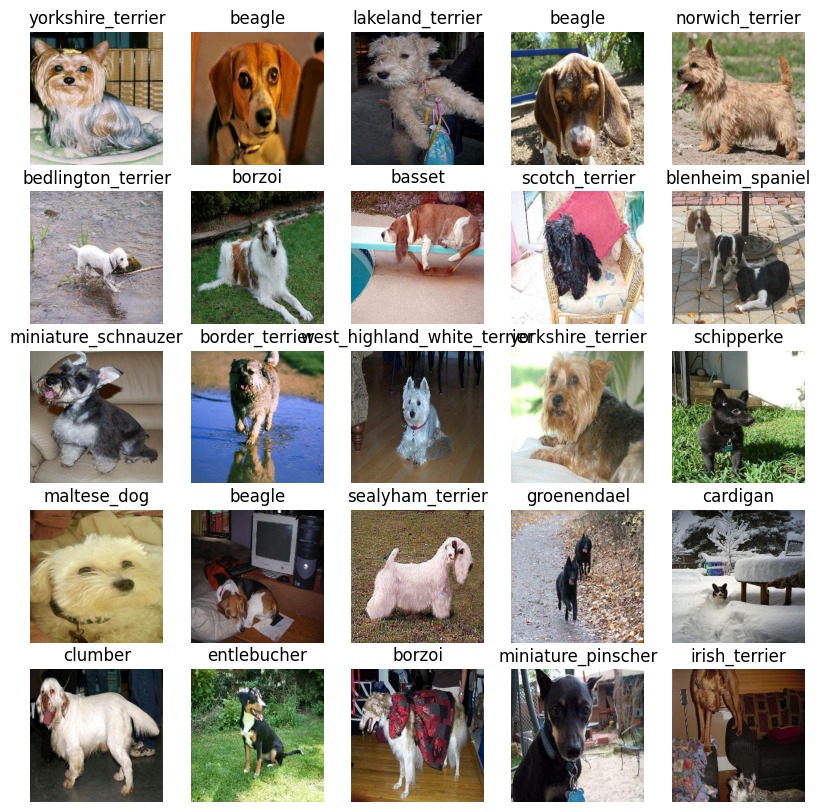

In [33]:
# lets visulaize train data
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

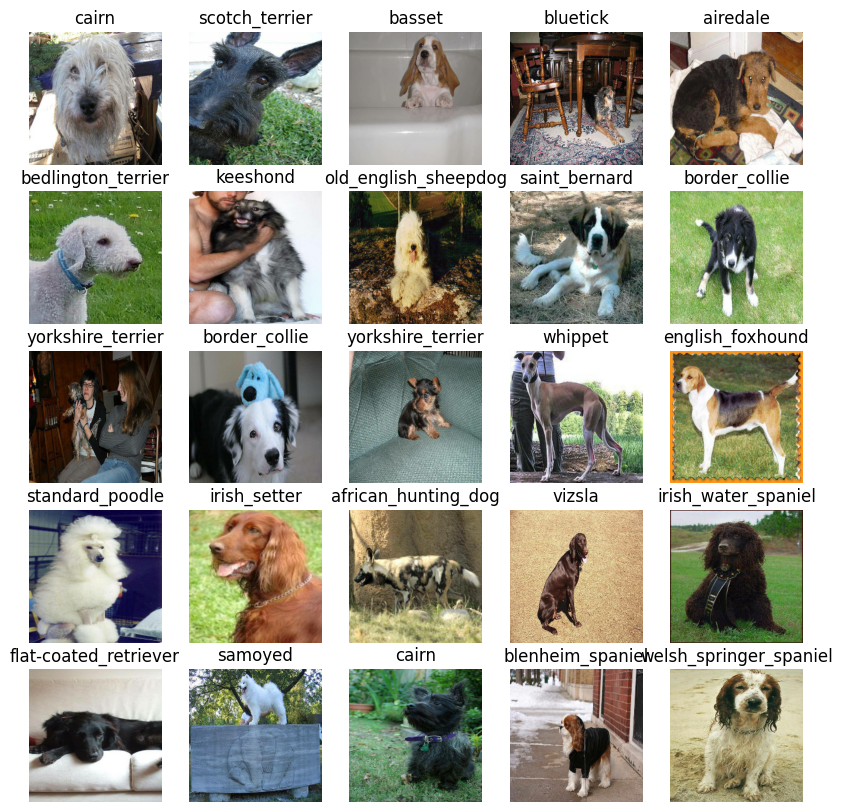

In [34]:
# lets visualize validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [35]:
## Building a model ##

# setup input shape to model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #  Batch, Height, Width, Colour channel

# setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

In [36]:
# setup model URL from tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

# Create  a function which build model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  # setup Model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Input Layer
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # output layers
      ])
  # compile model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
      )
  # build model
  model.build(INPUT_SHAPE)

  return model

In [37]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [38]:
## creating callback ##

# Tensorboard callback
%load_ext tensorboard

import datetime

def create_tensorboard_callback():
  # Create log directory for storing tensorboard logs.
  logdir = os.path.join("drive/My Drive/Dog-vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [39]:
# Early stoping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [40]:
# Traning a model (on subset of data)

NUM_EPOCHS = 100

# Build a function to train and retirn trained model
def train_model():
  """
  Train a given model and return the trained version.
  """
  # create model
  model = create_model()
  # Create new tensorboard session everytime we trained model
  tensorboard = create_tensorboard_callback()
  # fit model to data passing it the callback we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  #return fitted model
  return model

model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 12s 153ms/step - loss: 4.6698 - accuracy: 0.0938 - val_loss: 3.5625 - val_accuracy: 0.1950
Epoch 2/100
25/25 [==============================] - 4s 170ms/step - loss: 1.7043 - accuracy: 0.6363 - val_loss: 2.2014 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 3s 112ms/step - loss: 0.5960 - accuracy: 0.9262 - val_loss: 1.7592 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 4s 161ms/step - loss: 0.2626 - accuracy: 0.9862 - val_loss: 1.5587 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 5s 184ms/step - loss: 0.1546 - accuracy: 0.9937 - val_loss: 1.4599 - val_accuracy: 0.6050
Epoch 6/100
25/25 [==============================] - 4s 162ms/step - loss: 0.1057 - accuracy: 0.9987 - val_loss: 1.4107 - val_accuracy: 0.6050
Epoch 7/100
25/25 [=============================

In [41]:
## making and evaluating prediction using trained model ##
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 2s 111ms/step


array([[1.72938313e-03, 7.20151002e-05, 1.90590421e-04, ...,
        2.01056115e-04, 1.23261261e-05, 3.02450149e-03],
       [1.15560612e-03, 5.49081771e-04, 6.74171327e-03, ...,
        3.11302865e-04, 4.98578371e-03, 9.92171335e-05],
       [6.96850384e-06, 8.52915218e-06, 2.11023471e-05, ...,
        3.34172510e-05, 1.15887869e-05, 9.66360240e-05],
       ...,
       [4.65985022e-06, 1.79777071e-05, 9.21022274e-06, ...,
        9.57124485e-06, 3.38271275e-05, 1.41092285e-04],
       [6.89490931e-03, 6.83023536e-05, 1.79114984e-04, ...,
        1.73303459e-04, 8.08116311e-05, 9.91713442e-03],
       [2.24160307e-04, 1.10431145e-04, 4.11282061e-04, ...,
        1.94681145e-03, 2.30845224e-04, 9.47585722e-05]], dtype=float32)

In [42]:
# turn prediction probabilities into easier to understand
def get_pred_label(prediction_probabilities):
  """
  Turn an array of prediction into labels.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# get a prediction label based on array of prediction
pred_label = get_pred_label(predictions[81])
pred_label

'chihuahua'

In [43]:
# Create a function to unbatch and batch dataset
def unbatchify(data):
  """
  Take a batch dataset of (image, label) tensor and return separate array of image and labels
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# unbatch validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [44]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """

  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Plot images & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if predidtion is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)


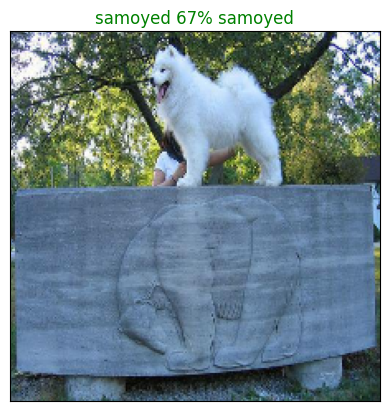

In [45]:
# Call the plot_pred() function
plot_pred(prediction_probabilities=predictions,
           labels=val_labels,
           images=val_images,
           n=21)

In [46]:

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  The top 10 highest prediction confidences along the truth label for sample.
  """
  pred_prob, true_labels = prediction_probabilities[n], labels[n]
  # Get predicted label
  pred_label = get_pred_label(pred_prob)
  # Find the top 10 prediction confidences index
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidences values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels.
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]
  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  # Change color of true label
  if np.isin(true_labels, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_labels)].set_color("green")
  else:
    pass

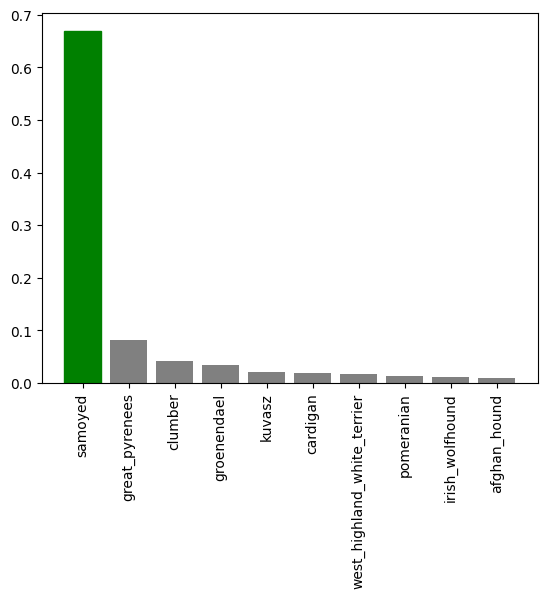

In [47]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=21)

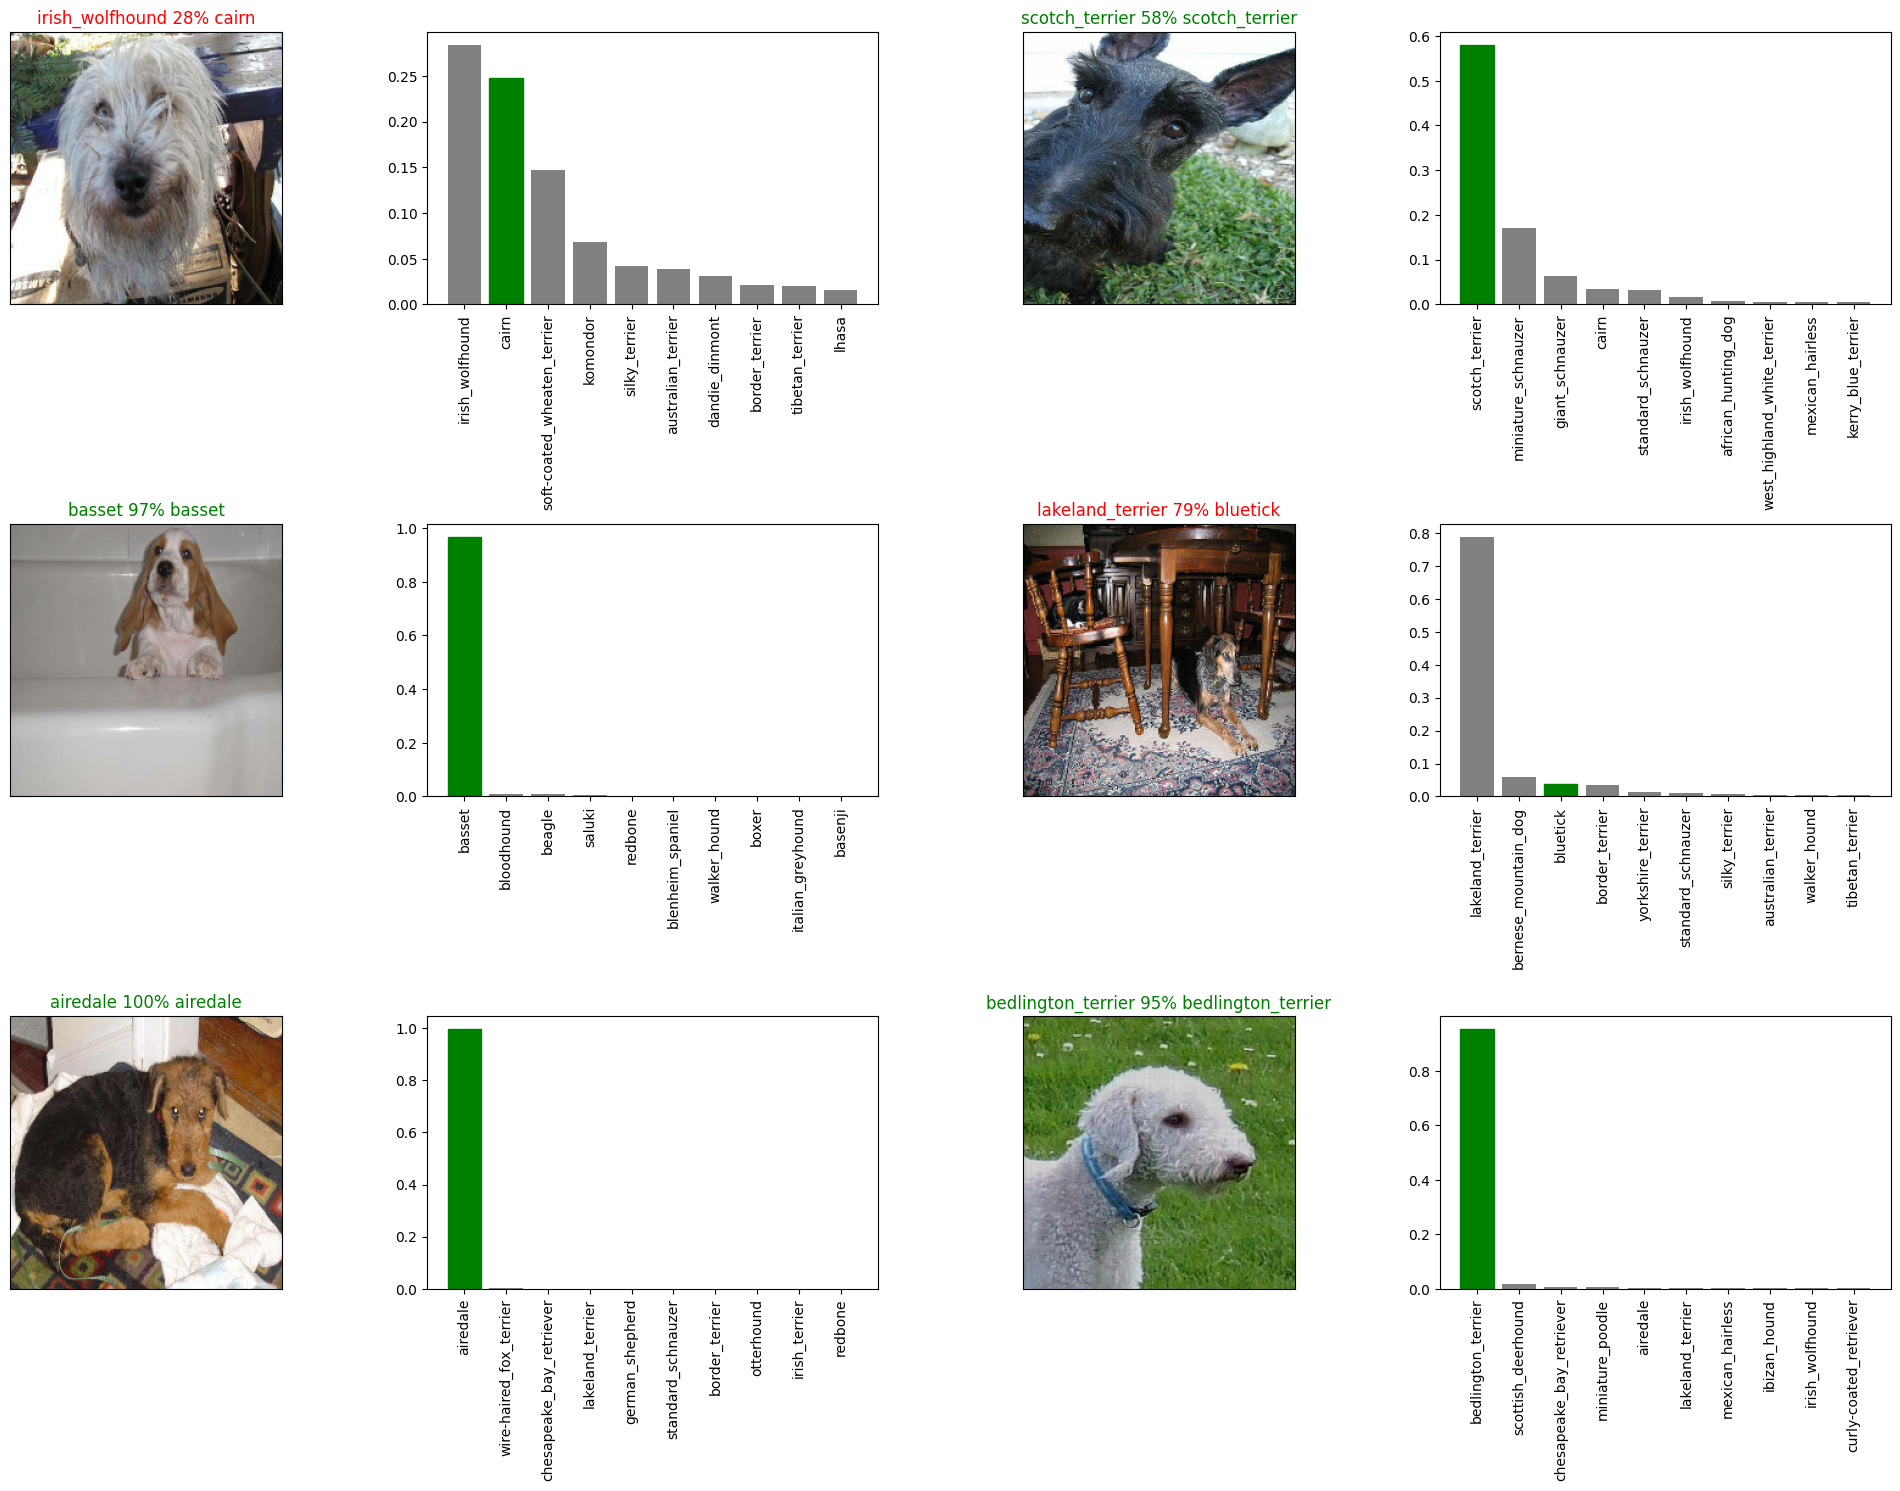

In [48]:
# Lets checkout a few predictions  and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [49]:
# create a function to save model
def save_model(model, suffix=None):
  """
  Saves given model in a models directory and append a string
  """
  modeldir = os.path.join("drive/My Drive/Dog-vision/Saved-model",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [50]:
# create model to load trained model
def load_model(model_path):
  """
  Load saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                    custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [51]:
# save model trained on 1000 images
save_model(model, suffix="1000-image-mobilenetv2-Adam")


Saving model to: drive/My Drive/Dog-vision/Saved-model/20231111-10551699700150-1000-image-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog-vision/Saved-model/20231111-10551699700150-1000-image-mobilenetv2-Adam.h5'

In [52]:
# Load a trained model
loaded_1000_img_model = load_model("drive/My Drive/Dog-vision/Saved-model/20231111-10171699697830-1000-image-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog-vision/Saved-model/20231111-10171699697830-1000-image-mobilenetv2-Adam.h5


In [53]:
loaded_1000_img_model.evaluate(val_data)

7/7 [==============================] - 1s 77ms/step - loss: 1.3371 - accuracy: 0.6650


[1.3371332883834839, 0.6650000214576721]

In [54]:
## Training on full dataset ##

len(X), len(y)

(10222, 10222)

In [55]:
# create data batch with full dataset
full_data = create_data_batches(X, y)

full_data

Creating training data batches...


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [56]:
# create model for full model
full_model = create_model()

# create full mmodel callback
full_model_tensorboard = create_tensorboard_callback()
# no validation set when traning on all data
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

# Fit full model data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])


Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
320/320 [==============================] - 43s 116ms/step - loss: 1.3506 - accuracy: 0.6687
Epoch 2/100
320/320 [==============================] - 33s 104ms/step - loss: 0.3992 - accuracy: 0.8839
Epoch 3/100
320/320 [==============================] - 30s 95ms/step - loss: 0.2383 - accuracy: 0.9358
Epoch 4/100
320/320 [==============================] - 32s 99ms/step - loss: 0.1550 - accuracy: 0.9628
Epoch 5/100
320/320 [==============================] - 33s 102ms/step - loss: 0.1048 - accuracy: 0.9785
Epoch 6/100
320/320 [==============================] - 31s 96ms/step - loss: 0.0767 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 32s 100ms/step - loss: 0.0584 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 35s 110ms/step - loss: 0.0446 - accuracy: 0.9954
Epoch 9/100
320/320 [==============================] - 31s 97ms/step - loss: 0

In [57]:
save_model(full_model, suffix="full-image-mobilenetv2-Adam")

Saving model to: drive/My Drive/Dog-vision/Saved-model/20231111-11081699700900-full-image-mobilenetv2-Adam.h5...


'drive/My Drive/Dog-vision/Saved-model/20231111-11081699700900-full-image-mobilenetv2-Adam.h5'

In [58]:
loaded_full_model = load_model("drive/My Drive/Dog-vision/Saved-model/20231111-10441699699465-full-image-mobilenetv2-Adam.h5")

Loading saved model from: drive/My Drive/Dog-vision/Saved-model/20231111-10441699699465-full-image-mobilenetv2-Adam.h5


In [59]:
## Making Prediction ##
test_path = "drive/My Drive/dog-breed-identification/test/"
test_filename = [test_path + fname for fname in os.listdir(test_path)]

test_filename[:10]

['drive/My Drive/dog-breed-identification/test/e3b9e9c903bbcf09fc0da06efabaec1c.jpg',
 'drive/My Drive/dog-breed-identification/test/e5ba665e01b6927411d60158f28160dd.jpg',
 'drive/My Drive/dog-breed-identification/test/e519e383a6efec0abd285beda04aeac9.jpg',
 'drive/My Drive/dog-breed-identification/test/e41802f671c437c10e843400dcea40fb.jpg',
 'drive/My Drive/dog-breed-identification/test/e520e4cd7608c47cd9017bb87e88f334.jpg',
 'drive/My Drive/dog-breed-identification/test/e1ada9b155a5903bc6475255d012f681.jpg',
 'drive/My Drive/dog-breed-identification/test/e2b4d6b6590fa2941e74238248093eb3.jpg',
 'drive/My Drive/dog-breed-identification/test/dcddc9135d0a138bb83a55bbc06adacc.jpg',
 'drive/My Drive/dog-breed-identification/test/ddbb53bb7ea7060847a0bd4554877e80.jpg',
 'drive/My Drive/dog-breed-identification/test/e7f95aabf775a636b3893ffa120adaf9.jpg']

In [60]:
len(test_filename)

10357

In [61]:
# create test data batch
test_data = create_data_batches(test_filename, test_data=True)
test_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [62]:
# prediction on test data using full model
test_predictions = full_model.predict(test_data,
                                      verbose=1)

324/324 [==============================] - 41s 125ms/step


In [64]:
# save prediction to csv file
np.savetxt("drive/My Drive/Dog-vision/pred_array.csv", test_predictions, delimiter=",")

In [65]:
# Load prediction from csv file
test_predictions = np.loadtxt("drive/My Drive/Dog-vision/pred_array.csv",delimiter=",")
test_predictions[:10]

array([[7.97326791e-08, 3.83480437e-05, 9.59038404e-10, ...,
        1.49650103e-09, 2.88401054e-08, 1.52747521e-06],
       [7.69998718e-11, 4.54318971e-10, 9.99026537e-01, ...,
        2.98825520e-10, 3.71967457e-10, 1.09724188e-10],
       [1.00815669e-05, 3.03516110e-08, 2.96181912e-10, ...,
        8.53042508e-08, 1.76672097e-11, 5.26924580e-11],
       ...,
       [7.14404313e-10, 1.58994914e-10, 2.89875068e-11, ...,
        1.43796032e-12, 6.79066317e-11, 3.07198766e-10],
       [1.81344783e-12, 6.51136913e-13, 1.04095760e-10, ...,
        8.05578111e-07, 8.78674477e-12, 1.48901114e-10],
       [6.84750199e-01, 5.81019732e-10, 1.13040759e-08, ...,
        3.92003263e-10, 7.90201966e-08, 3.61147468e-05]])

In [68]:
test_predictions.shape

(10357, 120)

In [66]:
# create pandes dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [69]:
# append test images ID's to predixtion Datframe
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [70]:
# Add prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e3b9e9c903bbcf09fc0da06efabaec1c   7.973268e-08  3.834804e-05   
1  e5ba665e01b6927411d60158f28160dd   7.699987e-11  4.543190e-10   
2  e519e383a6efec0abd285beda04aeac9   1.008157e-05  3.035161e-08   
3  e41802f671c437c10e843400dcea40fb   1.915011e-11  1.501116e-13   
4  e520e4cd7608c47cd9017bb87e88f334   5.600511e-01  1.376908e-09   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         9.590384e-10  5.331750e-09                    7.091845e-07   
1         9.990265e-01  2.322793e-11                    9.501942e-11   
2         2.961819e-10  2.318159e-08                    6.622484e-09   
3         9.219746e-12  2.326083e-13                    3.590087e-09   
4         1.414932e-09  1.243293e-12                    9.995950e-10   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  4.605628e-09        1.074288e-07  9.168194e-09  1.697396e-08  ...   
1  4.609212e-13        1.409341e-06  1.493886e-09  1.454877e-10  ...   
2  1.090196e-08        3.067685e-11  7.805522e-11  8.119549e-09  ...   
3  4.112628e-08        1.353076e-09  6.699959e-06  3.778580e-10  ...   
4  5.043857e-09        8.778513e-13  2.957520e-10  3.748194e-11  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  4.357389e-06  3.235969e-08  9.561126e-06  4.045633e-06  3.428731e-07   
1  1.957966e-08  4.205689e-08  2.334583e-10  1.060442e-12  1.215943e-10   
2  3.814222e-11  2.439165e-11  2.385571e-05  3.473958e-09  4.729495e-08   
3  7.037507e-11  1.022595e-10  4.259898e-12  2.021695e-10  2.285212e-13   
4  3.536899e-04  4.877781e-07  4.040439e-10  4.516942e-08  1.752174e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.485353e-08                 8.097392e-08  1.496501e-09   
1            4.674532e-10                 8.176627e-10  2.988255e-10   
2            1.464104e-12                 1.337738e-11  8.530425e-08   
3            7.165543e-08                 7.479652e-11  3.956685e-11   
4            2.338577e-11                 6.049491e-08  3.549376e-10   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.884011e-08       1.527475e-06  
1             3.719675e-10       1.097242e-10  
2             1.766721e-11       5.269246e-11  
3             4.544379e-08       2.293001e-14  
4             3.550057e-08       9.942424e-06  

[5 rows x 121 columns]

In [71]:
# save prediction Datframe to csv
preds_df.to_csv("drive/My Drive/Dog-vision/full_model_predictions_submission_1_mobilenetV2.csv", index=False)